In [6]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative

import sympy as sp
from ipywidgets import interact

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import fractions as fra


plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

Text(0.5, 1.0, 'e^-x+3x-x^2-1')

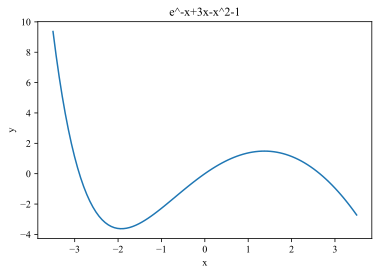

In [8]:
x_min = -3.5
x_max = 3.5
x = np.linspace(x_min,x_max,100)
y = (np.exp(-x))+(3*x)-(x**2)-1
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('e^-x+3x-x^2-1')



Text(0.5, 1.0, 'd/dx(e^-x+3x-x^2-1)')

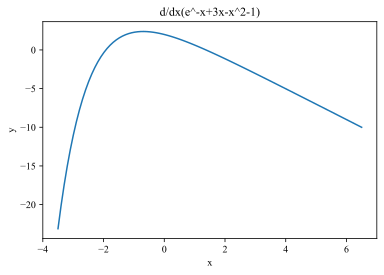

In [9]:
x_min = -3.5
x_max = 6.5
x = np.linspace(x_min,x_max,100)
y = (-np.exp(-x))+(3)-(2*x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('d/dx(e^-x+3x-x^2-1)')

Text(0.5, 1.0, 'e^-x+3x-x^2-1')

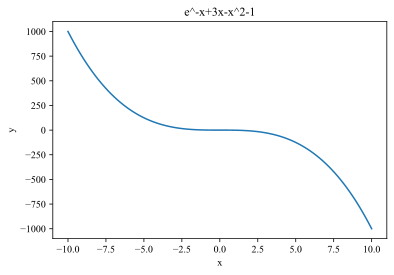

In [10]:
x_min = -10
x_max = 10
x = np.linspace(x_min,x_max,100)
y = -x**3
z= -x
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('e^-x+3x-x^2-1')



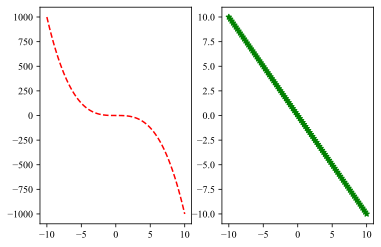

In [11]:
x_min = -10
x_max = 10
x = np.linspace(x_min,x_max,100)
y = -x**3
z= -x

plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(x, z, 'g*-');

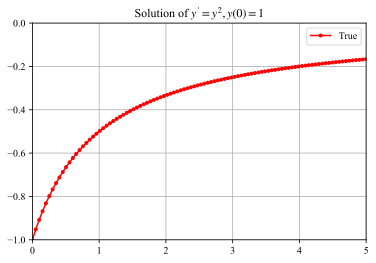

In [24]:
t = np.linspace(0,2,21)
y0 = 1
f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$")
plt.show()

In [13]:
# t --> x_sol(x0) = x(t;x0) 
t = np.arange(0,5,0.1)
x_sol = lambda x0: odeint(lambda x,t: np.sin(x),x0,t)




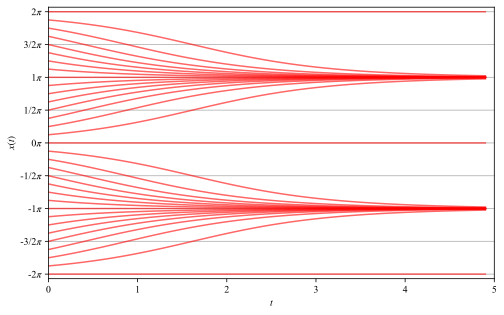

In [14]:
# plot x_sol(x0) vs t for different ICs (various values of x0)
fig, ax = plt.subplots(figsize=(8,5))
for x0 in np.arange(-2*np.pi,2.1*np.pi,np.pi/8):
    ax.plot(t,x_sol(x0),'r-',lw=1.5,alpha=0.6)
ax.set_xlim(0,5)
tp = np.arange(-2*np.pi, 2*np.pi+0.1, np.pi/2)
ax.set_yticks(tp)
ax.set_yticklabels([str(fra.Fraction(i/np.pi))+'$\pi$' for i in tp])
ax.set_ylim(-6.5,6.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(axis='y',which='major');

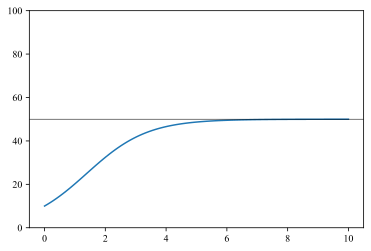

In [48]:

def f(N, t, r, K):
    return r * N * (1 - N/K)

r = 1.
K = 50.
N0 = 10.
t = np.linspace(0., 10, 100)

N = odeint(f, N0, t, args=(r,K))
plt.plot(t, N)
plt.ylim([0, 100])
plt.axhline(y=K, color='k', linewidth=0.5)
plt.show()

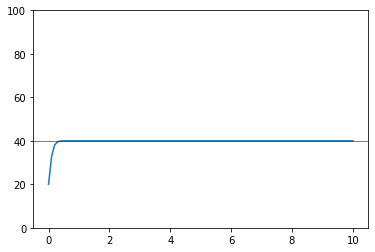

In [5]:
def f(N, t, r, K):
    return r * N * (1 - N/K)

r = 15.
K = 40.
N0 = 20.
t = np.linspace(0., 10, 100)

N = odeint(f, N0, t, args=(r,K))
plt.plot(t, N)
plt.ylim([0, 100])
plt.axhline(y=K, color='k', linewidth=0.5)
plt.show()

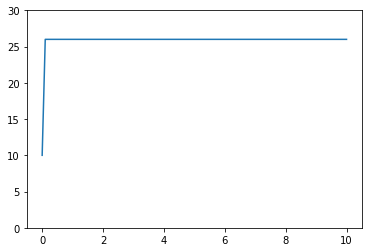

In [14]:
def f(N, t, r, a, b):
    return N*(r-a*(N-b**2))

r = 5.
a = 5.
b = 5.
N0 = 10.
t = np.linspace(0., 10, 100)

N = odeint(f, N0, t, args=(r,a,b))
plt.plot(t, N)
plt.ylim([0, 30])
plt.show()

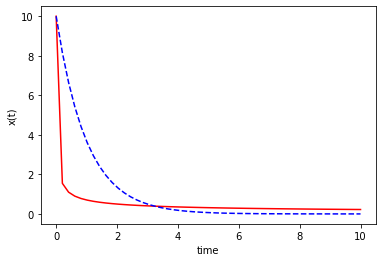

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dx/dt
def model(y,t):
    dydt = -y**3
    return dydt
    
def model_2(x,t):
    dxdt = -x
    return dxdt
# initial condition
y0 = 10
x0 = 10

# time points
t = np.linspace(0,10)

# solve ODE
y = odeint(model,y0,t)
x = odeint(model_2,x0,t)

# plot results
plt.plot(t,y, 'r-')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.plot(t,x, 'b--')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

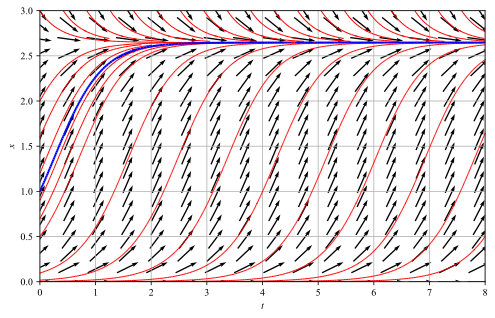

In [44]:
# plot x(t|x0) as stream-plot
# define f(x)
f = lambda x: (np.exp(-x))+(3*x)-(x**2)-1
# plot the slope field 
xx=np.linspace(0,10,20)
yy=np.linspace(0,3,20)
X,Y = np.meshgrid(xx,yy)

fig, ax0=plt.subplots(figsize=(8,5))

x0 = np.linspace(0,8,20)
y0 = np.ones(len(x0))*3
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=4,
               linewidth=1,color='red',arrowstyle='-')

x0 = np.linspace(0,8,10)
y0 = np.ones(len(x0))*0.5
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=10,
               linewidth=1,color='red',arrowstyle='-')

y0 = [0.7,0.9,1.2,1.6,2]
x0 = np.zeros(len(y0))
seed_points=np.array([x0,y0])
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=seed_points.T,density=5,
               linewidth=1,color='red',arrowstyle='-')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,1]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

U = 1+0*X; V = f(Y)
NU = np.sqrt(U**2+V**2)
ax0.quiver(X,Y,U/NU,V/NU, pivot='mid',angles='xy', scale=3, scale_units='inches'
#             ,headlength=0, headaxislength=0,zorder=3
          )

ax0.grid(axis='both')  
ax0.set_xlim(0,8)
ax0.set_ylim(0,3)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$x$')
# fig.savefig('FIGS/LE_slope-field.pdf')
plt.show()